<a href="https://colab.research.google.com/github/mrenrique/projects/blob/main/posts/exploratory-data-analysis-youtube-channel-red-bull/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

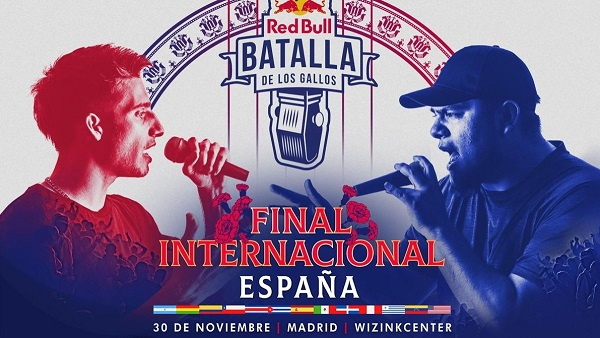

## TL;DR 🤓

This project's aim is to perform some common EDA tasks on the created dataset containing information of all International Matches of Freestyle organized by Red Bull from 2015 to 2020 (filtered by `internacional` and ` vs ` keywords). **Red Bull Batalla de los Gallos** is the Most Recognized **Freestyle Competition in Spanish** that brings together the **16 winning Freestylers** from the competitions organized by Red Bull in each country. After all matches only one of them is crowned as international champion [Click here to learn more](https://rap.fandom.com/es/wiki/Red_Bull_Batalla_de_los_Gallos)

## Importing Libraries ✔️

In order to achieve the goal of this project, It's necesary to install & import some libraries that will make our life a lot easier.

- `Numpy` for doing mathematical operations
- `Pandas` for manipulating structured data & making EDA
- `Matplotlib` & `Seaborn`, this one help us create graphs to visually understand the EDA
- `Datetime` will make the task of dealing with time data a lot easier


Once imported all the libraries requieres, let's also check their version as reference.

In [ ]:
#collapse-hide
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_theme(style="ticks", color_codes=True)

# Check Libraries' version
print('Numpy version: '+np.__version__)
print('Pandas version: '+pd.__version__)
print('Matplotlib version: '+matplotlib.__version__)
print('Seaborn version: '+sns.__version__)

Numpy version: 1.21.6
Pandas version: 1.3.5
Matplotlib version: 3.2.2
Seaborn version: 0.11.2


## Customized Settings 🎨

In the hidden code cell bellow there is two functions, both of them customizes som of the default parameters of the graphs, to make them look a bit cleaner and easy to digest.

Also, It's advisable to present graphs with the same colors as the brand to make it a bit relatable, so I picked & used the event's logo colors for this purpose. To get these color palette I used this website which is very useful for this task: https://coolors.co/image-picker

In [ ]:
#collapse-hide
# Custom palette
# https://www.youtube.com/watch?v=2wRHBodrWuY
g=[]

# def customPlotSettings(graph=g, figW=6.4, figH=5, XorY=plt.yticks([])):
def customPlotSettings(graph=g, figW=6.4, figH=5, dimension=1000, Character='k'):

    g.fig.set_figwidth(figW)
    g.fig.set_figheight(figH)

    ax=g.facet_axis(0,0)

    for p in ax.patches:
        height = p.get_height() # height of each horizontal bar is the same
        width = p.get_width()
        ax.text(p.get_x() + (width / 2),
                height * 1.03, # # y-coordinate position of data label, padded to be in the middle of the bar,
                f'{(height / dimension ):.0f}'+Character+'',
                # f'{(height / fHeight ):.0f}K',
                ha='center'
                )

    # Remove frame (or all the spines at the same time)
    ax.set_frame_on(False)

    custom_params = {
                     'axes.titlesize':16,
                     'ytick.left': False,
                     'axes.titlepad': 20
                    }

    sns.set_theme(style='white', font_scale=1.1 , rc=custom_params)

    custom_palette = ['#203175','#E30C4C','#FDCA24']
    sns.set_palette(custom_palette)

def customHistSettings(figW=6.4):

    fig, ax = plt.subplots()
    custom_params = {
                     'figure.figsize':(figW,5),
                     'axes.titlesize':16,
                     'ytick.left': False
                    }
    sns.set_theme(style='white', rc=custom_params)

    ax.grid(axis ='x', color ='0.95')
    ax.set_frame_on(False)
    plt.yticks([])

    custom_palette = ['#203175','#E30C4C','#FDCA24']
    sns.set_palette(custom_palette)

## Importing dataset 🗃️

Let's start by importing from Github the tidy dataset which was a result from the previous tutorial. This tutorial covered [Data Preprocessing Videos Details of a Youtube Channel](https://mrenrique.github.io/blog/data%20preprocessing/python/data%20science/pandas/numpy/2021/01/10/data-preprocessing-with-pandas-numpy.html)

Also, I'll print 3 random rows to check the dataset was imported succesfully.

In [ ]:
data_url = 'https://raw.githubusercontent.com/mrenrique/EDA-to-Youtube-Channel-Videos/main/clean_data.csv'
data = pd.read_csv(data_url, index_col='id')

# show first three rows
data.sample(3)

,title,views,year,length,likes,dislikes
id,,,,,,
43,YERIKO vs PEPE GRILLO,263529,2018,00:07:14,5625,655
65,GASPER vs SHADOW,1219652,2016,00:04:52,9546,3275
54,WOS vs. SKONE,4220417,2017,00:00:14,58139,2761


## Data Pre-processing 🧼

Let's get a glance of the structure of the dataset and their properties

In [ ]:
data.info()

Now, I'll start with some modifications on the features. From above, I noticed that the column `length` has time related values, so it's requiered to give it a proper format and assign the data type.

In [ ]:
data['length'] = pd.to_datetime(data['length'], format="%H:%M:%S")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     92 non-null     object        
 1   views     92 non-null     int64         
 2   year      92 non-null     int64         
 3   length    92 non-null     datetime64[ns]
 4   likes     92 non-null     int64         
 5   dislikes  92 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 5.0+ KB


How about the videos title? Are there any duplicated value?

In [ ]:
data['title'].unique()

Almost correct, except for the name of a Frestyler which appears as `VALLES T ` and `VALLEST`. Since it make reference to the same artist, we go on and replace the assure only one way of naming him.

We'll check the changes by filtering part of his nicknake that contain `VALLES` in the `title` column.

In [ ]:
# https://note.nkmk.me/en/python-str-replace-translate-re-sub/
data['title'] = [i.replace('VALLEST', 'VALLES-T').replace('VALLES T', 'VALLES-T') for i in data['title']]

data['title'][data['title'].str.contains('VALLES')]

id
10    BNET vs VALLES-T - Octavos | Red Bull Internac...
17    BNET vs VALLES-T - Final | Red Bull Internacio...
19    VALLES-T vs CHANG - Octavos | Red Bull Interna...
25    VALLES-T vs JOKKER - Cuartos | Red Bull Intern...
30    VALLES-T vs ACZINO - Semifinal | Red Bull Inte...
35                              VALLES-T vs PEPE GRILLO
38                                     VALLES-T vs BNET
40                                      VALLES-T vs KDT
46                                      VALLES-T vs WOS
66                                VALLES-T vs CIUDADANO
72                                     JOTA vs VALLES-T
Name: title, dtype: object

One these changes were made, we're good to go to enrich the dataset.

## Feature Engineering 🏗️

Moving on, to enrich this small dataset & find some insights, I split the `title` column into
`Freestyler A` & `Freesttyler B` that are the two rival artists. I used list comprehensions for achieving this task. As always, I printed some samples to check last changes.

In [ ]:
# https://stackoverflow.com/questions/40705480/python-pandas-remove-everything-after-a-delimiter-in-a-string
data['Freestyler_A'] = [i.replace('.', '').lower().split(' vs ')[0].strip().title() for i in data['title']]
data['Freestyler_B'] = [i.replace('.', '').split(' -')[0].lower().split(' vs ')[-1].strip().title() for i in data['title']]

#Moving the columns position
data.columns.tolist()

data = data[['title', 'Freestyler_A', 'Freestyler_B', 'views', 'year', 'length', 'likes', 'dislikes']]

data.sample(5)

,title,Freestyler_A,Freestyler_B,views,year,length,likes,dislikes
id,,,,,,,,
58,YENKY ONE vs. G,Yenky One,G,322030,2017,1900-01-01 00:04:48,5734,1363
15,ACZINO vs SHIELD MASTER,Aczino,Shield Master,154369,2020,1900-01-01 00:06:51,5439,471
23,JOKKER vs LITZEN,Jokker,Litzen,2546416,2019,1900-01-01 00:09:46,40625,900
72,JOTA vs VALLES-T,Jota,Valles-T,1073224,2016,1900-01-01 00:05:04,13330,6872
11,EXODO LIRICAL vs MAC,Exodo Lirical,Mac,105707,2020,1900-01-01 00:06:13,5319,254


## Exploratory Data Analysis 💡

Now we are finally in the exciting part of this notebook: EDA Process.

### General View of the Dataset

Let's take a look at the datafame's properties for a better understanding to know what needs to be done. To do so, we can use the `info()` method which gives us the number of columns, **columns names** and their **data types** all together.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     92 non-null     object
 1   views     92 non-null     int64 
 2   year      92 non-null     int64 
 3   length    92 non-null     object
 4   likes     92 non-null     int64 
 5   dislikes  92 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 5.0+ KB


How about how many rows and columns the dataset has?

In [ ]:
data.shape

print("The Dataset has", data.shape[0],"rows with", data.shape[1],"features.")

The Dataset has 92 rows with 6 features


Let's summarize some statistical metrics of the dataset by using `describe()` function.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
views,92.0,4.773642e+06,8.383880e+06,47082.0,661099.50,1715757.0,4372855.00,44005544.0
year,92.0,2.017609e+03,1.670405e+00,2015.0,2016.00,2018.0,2019.00,2020.0
likes,92.0,6.649529e+04,1.203502e+05,1510.0,9971.25,29532.5,59178.00,729024.0
dislikes,92.0,8.634130e+03,2.347569e+04,55.0,607.00,1645.0,5667.75,194847.0


How about how many unique values it has?

In [ ]:
data.nunique()

title       88
views       92
year         6
length      77
likes       92
dislikes    92
dtype: int64

### Let's Analyze each Feature
Univariate Analysis

Once we get a general glance of the datasets properties & statistics, now we can proceed to leverage the power of Data Visualization (graphs) to better understand any aspect of each feature of the dataset.

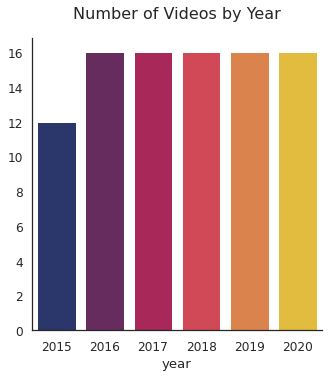

In [ ]:
#collapse-hide
g = sns.catplot(data=data, x='year', kind='count', palette=sns.blend_palette(['#203175','#E30C4C','#FDCA24'])) # Set your custom color palette
g.set(ylabel=None)

plt.title('Number of Videos by Year');

Let's find out, how many times each Freestyler appears on the video's title? Put it in other words, how many times Each Freestyler has a battle participation on this international event?

In [ ]:
F_concated = pd.concat([data['Freestyler_A'], data['Freestyler_B']])
F_concated.value_counts()

Aczino       21
Arkano       14
Valles-T     11
Skone        10
Bnet         10
             ..
Yeriko        1
Rvs           1
Dozer         1
Redencion     1
Mrjunior      1
Length: 62, dtype: int64

The same as above, but graphically presented

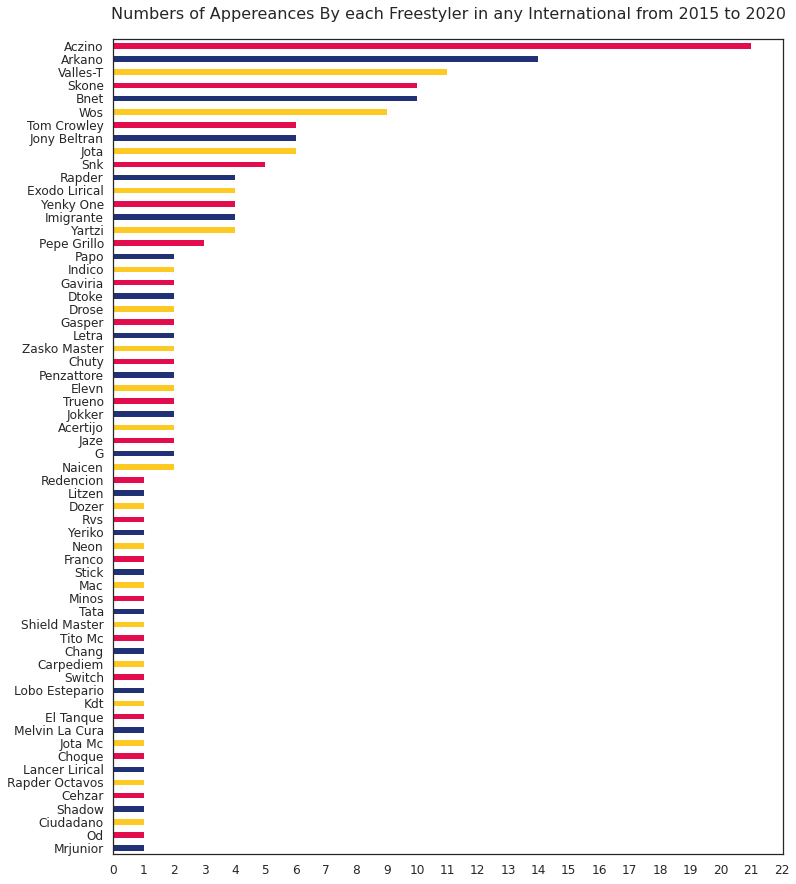

In [ ]:
#collapse-hide
import matplotlib.ticker as mticker

F_concated.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(12, 15), color=['#203175','#E30C4C','#FDCA24'])
# Show x Axis as integer
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

g.set(xlabel=None)
g.set(ylabel=None)

plt.title('Numbers of Appereances By each Freestyler in any International from 2015 to 2020');

Now I wanted to present the distribution of each variable. In this case, the distribution of `Views` feature.

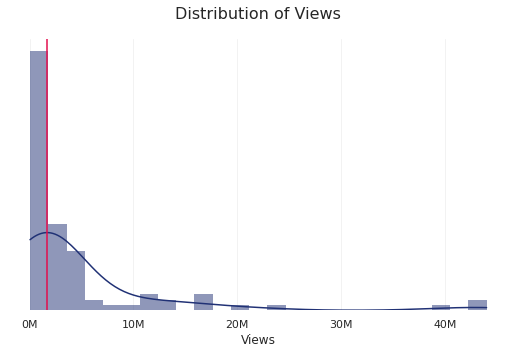

In [ ]:
#collapse-hide
customHistSettings(figW=9)

g=sns.histplot(data.views, bins=25, kde=True, stat='density', linewidth=0)
plt.xlabel('Views')
plt.title('Distribution of Views')

xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/(1000000)]
g.set_xticklabels(xlabels)

#Plooting the median
mean = data.views.median()
mean
plt.axvline(mean, 0, 1, color='#E30C4C');

Let's present the same as before but using a `boxplot` graph that help us to undestard the data ranges by quartiles and also point out any outlies that lies outside the whiskers.

Text(0.5, 1.0, 'Distribution of Views')

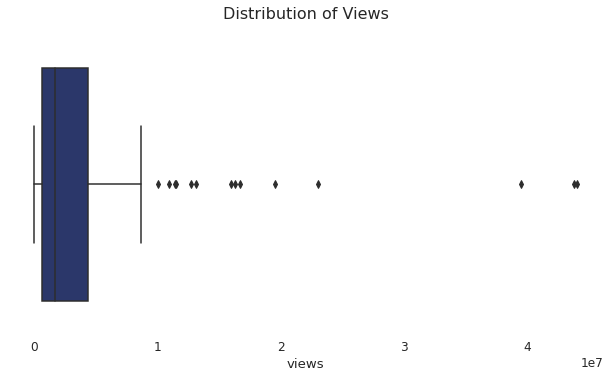

In [ ]:
#collapse-hide
g=sns.catplot(data=data, x='views', kind='box')
customPlotSettings(figW=9)
plt.title('Distribution of Views (M)')

From above, we can tell that many videos has less than 1 Million views and that there are some outiers, even so, 3 of them has over 40 million views.

How behaves the `Likes` feature?

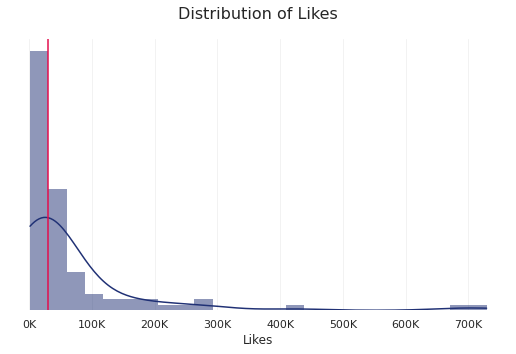

In [ ]:
#collapse-hide
customHistSettings(figW=9)

g=sns.histplot(data.likes, bins=25, kde=True, stat='density', linewidth=0)
plt.xlabel('Likes')
plt.title('Distribution of Likes')

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

#Plooting the median
mean = data.likes.median()
mean
plt.axvline(mean, 0, 1, color='#E30C4C');

Many of the videos are quite popular & likeables, they range from between 100k & 300k of likes, except for the outlier that has more than 700k.

Now let's analyzed the opposite, the `dislikes` feature.

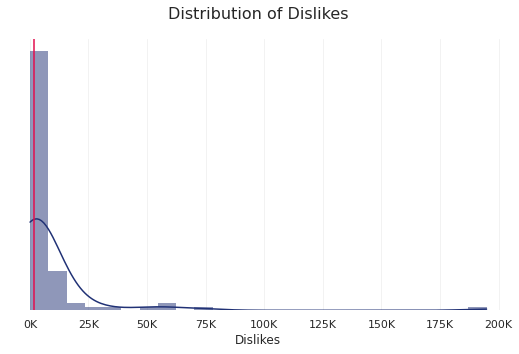

In [ ]:
#collapse-hide
customHistSettings(figW=9)

g=sns.histplot(data.dislikes, bins=25, kde=True, stat='density', linewidth=0)
plt.xlabel('Dislikes')
plt.title('Distribution of Dislikes')

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

#Plooting the median
mean = data.dislikes.median()
mean
plt.axvline(mean, 0, 1, color='#E30C4C');

Many of the videos falls into the range of 0k to 25k of dislikes, which is okey for videos with views over 170k  and likes on average of +20k

### How They Behave if We Put Them Together? 🤔
Bivariate Analysis

Let's moving on to find out how these featues behave when we analyzed them together.

We can see that, on average, many views were gathered mostly in 2019 & 2015, the latter one also surpass the other four years. Also, the year with less views was 2020.

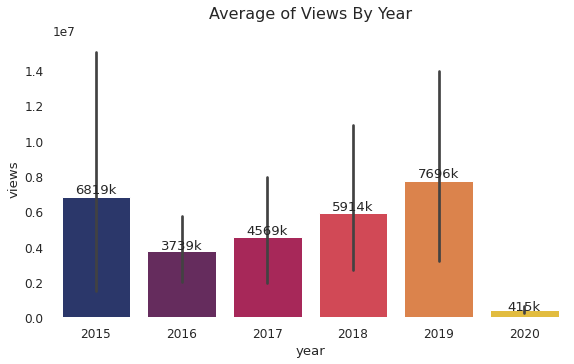

In [ ]:
#collapse-hide
g=sns.catplot(data=data, x='year', y='views', estimator=np.mean, kind='bar', palette=sns.blend_palette(['#203175','#E30C4C','#FDCA24']))
plt.title('Average of Views By Year')

customPlotSettings(figW=9);

When plotting the views by year, it's noticeable that most years, except for 2020, have outlies which will increment the average of views. Furthermore, 2005, 2018 y 2019 have battle videos (outliers) with more than 40M of views.

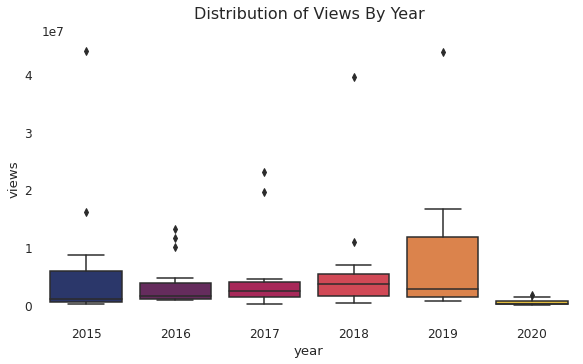

In [ ]:
#collapse-hide
g=sns.catplot(data=data, x='year', y='views', kind='box', palette=sns.blend_palette(['#203175','#E30C4C','#FDCA24']))
plt.title('Distribution of Views By Year')

customPlotSettings(figW=9);

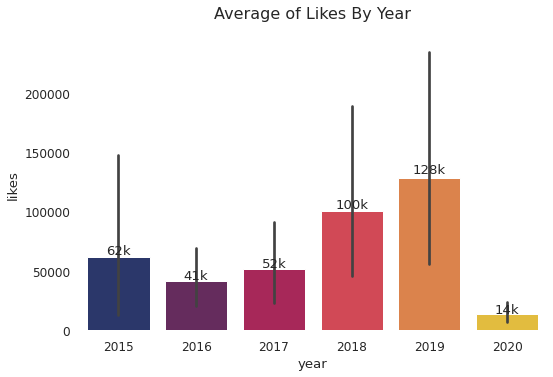

In [ ]:
#collapse-hide
g=sns.catplot(data=data, x='year', y='likes', estimator=np.mean, kind='bar', palette=sns.blend_palette(['#203175','#E30C4C','#FDCA24']))
plt.title('Average of Likes By Year')

customPlotSettings(figW=9);

Here, we can see that videos from 2018 and 2019 has the most number of likes (+700K). Also, except for 2019, most years has a close range with not much variation.

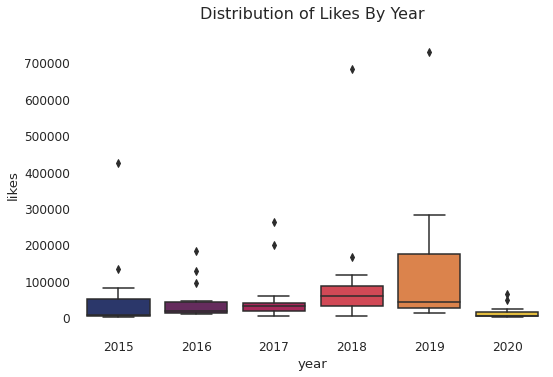

In [ ]:
#collapse-hide
g=sns.catplot(data=data, x='year', y='likes', kind='box', palette=sns.blend_palette(['#203175','#E30C4C','#FDCA24']))
plt.title('Distribution of Likes By Year')

customPlotSettings(figW=9);

### Correlation between Numerical Features

Now let's continue to analyze if there is any correlation between Numerical Features. I used `.corr()` and then seaborn's `.heatmap()` function to plot a heatmap graph for an easy-to-digest understanding of correlation for each numerical features

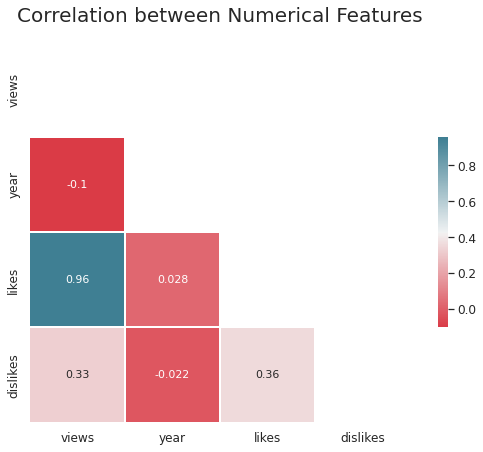

In [ ]:
#collapse-hide
# Calculate correlation between each pair of variable
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Insert a figure
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask
ax = sns.heatmap(corr,
                 mask=mask,
                 cmap=cmap,
                 annot=True,
                 annot_kws= {'size':11},
                 square=True, xticklabels=True,
                 yticklabels=True,
                 linewidths=.5,
                 cbar_kws={'shrink': .5},
                 ax=ax
                )
ax.set_title('Correlation between Numerical Features', fontsize=20);

We can drew from the previous graph that there is a **high positive correlation** between `views` & `likes` (not surprising). Besides that, theres is a **high negative correlation** between `years` &  `views` and a **low negative corrlation** between `years` and `dislikes`.

Having into consideration the previous insight, let's plot a `Scatterplot` to show what this correlation between `views` and `likes` looks like.

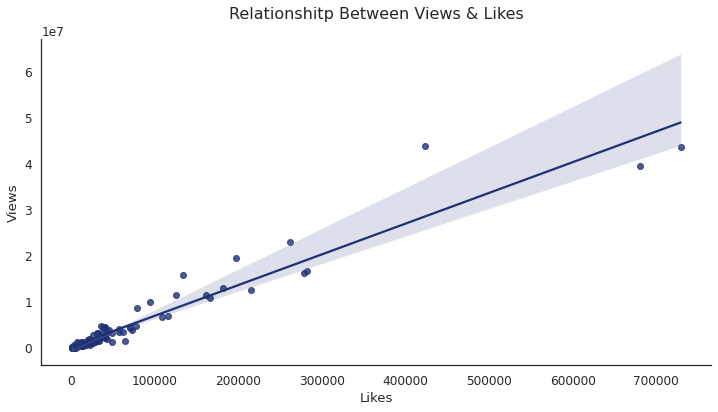

In [ ]:
#collapse-hide
plt.figure(figsize=(12,6))
# use the scatterplot function to build the bubble map
g=sns.regplot(data=data, x='likes', y='views')
sns.despine()

# Add titles (main and on axis)
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('Relationshitp Between Views & Likes');

Finally, let's plot it by `years` to see how this relationship behaves.

Text(0.5, 0.98, 'Relationshitp Between Views & Likes By Year')

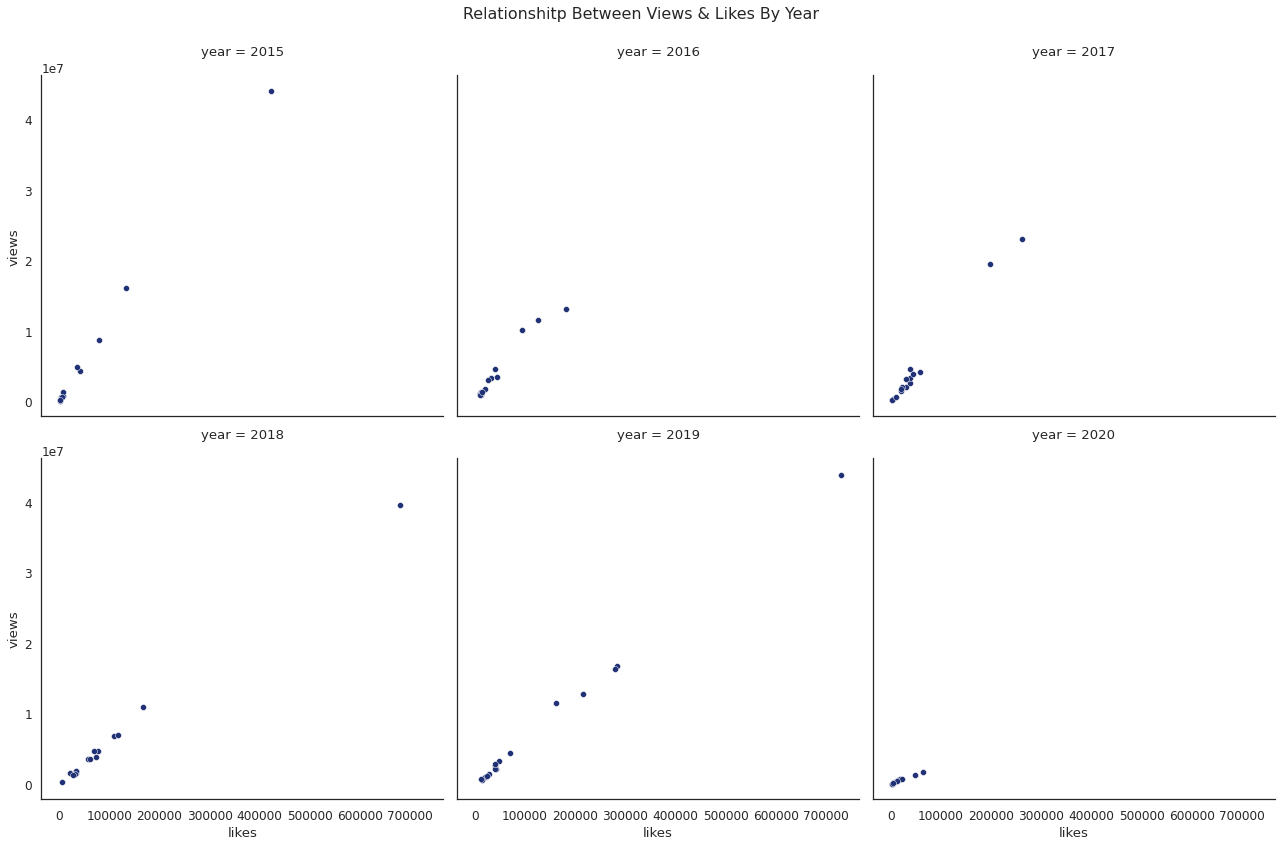

In [ ]:
#collapse-hide
g = sns.relplot(data=data,
                 x='likes',
                 y='views',
                 col='year',
                 kind='scatter',
                 col_wrap=3,
                 height=6)

g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('Relationshitp Between Views & Likes By Year');

You're Awesome 😍, you just reached the end of this post. If you have any questions just [drop me a message on my LikedIn](https://www.linkedin.com/in/enriquemosqueira/). Also, any suggestion or kudos would be quite appreciated. Did you find it useful? [Check out my other posts here](https://mrenrique.github.io/blog/), I'm sure you'll find something interesting 💡.

Share this post with your friends/colleagues, and if you are in a good mood, [buy me a cup of coffee ☕](https://www.buymeacoffee.com/enriquemr9X). Nos vemos! 🏃💨